# 🚀 RoastFormer Comprehensive Training Suite - FIXED

**Complete Ablation Studies with Normalization Fix**

Author: Charlee Kraiss  
Project: RoastFormer - Transformer-Based Roast Profile Generation  
Date: November 19, 2024

---

## 📋 What This Notebook Does

1. ✅ Runs ALL scientific experiments with normalization fix
2. ✅ Positional encoding ablation (Sinusoidal vs Learned vs **RoPE**)
3. ✅ Flavor conditioning ablation (validates novel contribution)
4. ✅ Model size comparison
5. ✅ Optional: Before/after fix comparison
6. ✅ Compatible checkpoints for evaluation demo

**🔧 THE FIX**: Temperature normalization to [0, 1] range

**Experiments Available:**
- **Tier 1 (Model Size)**: micro (d=32), tiny (d=64), medium (d=128)
- **Tier 2 (Positional Encoding)**: sinusoidal, learned, **RoPE**
- **Tier 3 (Ablation)**: with/without flavor conditioning
- **Tier 4 (Debugging)**: broken model comparison

**Est. Runtime**: 1-3 hours on GPU (depends on selection)

---

## 1️⃣ Setup Environment

In [1]:
# Check GPU
import torch
print("="*80)
print("GPU CHECK")
print("="*80)
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")
    device = 'cuda'
    print("✅ GPU ready!")
else:
    print("⚠️  No GPU - Go to Runtime → Change runtime type → GPU")
    device = 'cpu'
print("="*80)

GPU CHECK
CUDA available: True
GPU: NVIDIA L4
CUDA version: 12.6
✅ GPU ready!


In [2]:
# Install packages
!pip install -q pandas scikit-learn matplotlib seaborn numpy
print("✅ Dependencies installed")

✅ Dependencies installed


In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Navigate to project
%cd /content/gdrive/MyDrive/"Colab Notebooks"/"GEN_AI"

/content/gdrive/MyDrive/Colab Notebooks/GEN_AI


## 2️⃣ Extract Data

In [5]:
import zipfile
import os
import json

print("="*80)
print("EXTRACTING DATA")
print("="*80)

zip_path = '/content/gdrive/MyDrive/Colab Notebooks/GEN_AI/roastformer_COMPLETE_20251120_091514.zip'
if os.path.exists(zip_path):
    os.chdir('/content')
    print(f"Working directory: {os.getcwd()}")

    print(f"\n📦 Extracting...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')

    print("✅ Extraction complete")

    with open('preprocessed_data/dataset_stats.json', 'r') as f:
        stats = json.load(f)
    print(f"\n📊 Dataset: {stats['total_profiles']} profiles")
    print(f"   Training: {stats['train_size']}")
    print(f"   Validation: {stats['val_size']}")
else:
    print(f"❌ Zip not found at: {zip_path}")

print("="*80)

EXTRACTING DATA
Working directory: /content

📦 Extracting...
✅ Extraction complete

📊 Dataset: 144 profiles
   Training: 123
   Validation: 21


## 3️⃣ EXPERIMENT CONFIGURATION HUB

**👉 CONFIGURE YOUR EXPERIMENTS HERE 👈**

### Tier 1: Model Size Comparison ✅
All use sinusoidal PE, with flavors, with normalization
- `micro_d32`: Fast baseline (d=32, ~45K params, 10 min)
- `tiny_d64`: Production model (d=64, ~218K params, 20 min)
- `medium_d128`: Best accuracy (d=128, ~1M params, 40 min)

### Tier 2: Positional Encoding Ablation ✅
All use d=64 for fair comparison
- `sinusoidal_pe`: Baseline (already in tiny_d64)
- `learned_pe`: Learned positional embeddings
- `rope_pe`: **RoPE** (you presented on this!)

### Tier 3: Flavor Conditioning Ablation ✅
Tests your novel contribution
- `with_flavors`: Baseline (already in tiny_d64)
- `no_flavors`: Remove flavor features

### Tier 4: Debugging Comparison (Optional)
- `broken_model`: Without normalization (shows bug for presentation)

In [6]:
# ═══════════════════════════════════════════════════════════════
# EXPERIMENT CONFIGURATION HUB
# ═══════════════════════════════════════════════════════════════

EXPERIMENTS = {
    # ─── TIER 1: MODEL SIZE COMPARISON ───
    'micro_d32': True,           # Fast baseline (10 min)
    'tiny_d64': True,            # Production model (20 min)
    'medium_d128': True,         # Best accuracy (40 min)
     # In EXPERIMENTS dict:
    'original_d256': True,       # ⚠️ TOO LARGE - for comparison (60 min)


    # ─── TIER 2: POSITIONAL ENCODING ABLATION ───
    'learned_pe': True,          # Learned PE (20 min)
    'rope_pe': True,             # RoPE - YOU PRESENTED ON THIS! (20 min)
    # Note: tiny_d64 serves as sinusoidal baseline

    # ─── TIER 3: FLAVOR ABLATION ───
    'no_flavors': True,          # Tests novel contribution (20 min)
    # Note: tiny_d64 serves as with-flavors baseline

    # ─── TIER 4: DEBUGGING COMPARISON ───
    'broken_model': False,       # Without normalization (20 min) - Enable for presentation
}

# Base configuration (shared across all experiments)
BASE_CONFIG = {
    # Architecture defaults (overridden per experiment)
    'd_model': 64,
    'nhead': 4,
    'num_layers': 3,
    'dim_feedforward': 256,
    'embed_dim': 32,
    'dropout': 0.2,
    'positional_encoding': 'sinusoidal',

    # Training hyperparameters (same for all)
    'batch_size': 8,
    'num_epochs': 20,
    'learning_rate': 1e-4,
    'weight_decay': 0.01,
    'grad_clip': 1.0,
    'early_stopping_patience': 15,
    'max_sequence_length': 800,

    # System
    'device': device,
    'preprocessed_dir': 'preprocessed_data',
    'save_every': 5,

    # Fix settings
    'use_normalization': True,
    'use_flavors': True,
}

# Generate experiment configs
experiment_configs = {}

# ─── TIER 1: MODEL SIZE ───
if EXPERIMENTS['micro_d32']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 32,
        'nhead': 2,
        'num_layers': 2,
        'dim_feedforward': 128,
        'num_epochs': 15,
        'experiment_name': 'micro_d32_sinusoidal_with_flavors',
        'checkpoint_dir': 'checkpoints/micro_d32',
        'results_dir': 'results/micro_d32',
    })
    experiment_configs['micro_d32'] = config

if EXPERIMENTS['tiny_d64']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 64,
        'nhead': 4,
        'num_layers': 3,
        'dim_feedforward': 256,
        'num_epochs': 20,
        'experiment_name': 'tiny_d64_sinusoidal_with_flavors',
        'checkpoint_dir': 'checkpoints/tiny_d64',
        'results_dir': 'results/tiny_d64',
    })
    experiment_configs['tiny_d64'] = config

if EXPERIMENTS['medium_d128']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 128,
        'nhead': 4,
        'num_layers': 4,
        'dim_feedforward': 512,
        'num_epochs': 25,
        'experiment_name': 'medium_d128_sinusoidal_with_flavors',
        'checkpoint_dir': 'checkpoints/medium_d128',
        'results_dir': 'results/medium_d128',
    })
    experiment_configs['medium_d128'] = config

 # In config generation (after medium_d128):
if EXPERIMENTS['original_d256']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 256,
        'nhead': 8,
        'num_layers': 6,
        'dim_feedforward': 1024,
        'num_epochs': 30,
        'experiment_name': 'original_d256_TOO_LARGE',
        'checkpoint_dir': 'checkpoints/original_d256',
        'results_dir': 'results/original_d256',
    })
    experiment_configs['original_d256'] = config

# ─── TIER 2: POSITIONAL ENCODING ───
if EXPERIMENTS['learned_pe']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 64,
        'positional_encoding': 'learned',
        'num_epochs': 20,
        'experiment_name': 'tiny_d64_LEARNED_with_flavors',
        'checkpoint_dir': 'checkpoints/learned_pe',
        'results_dir': 'results/learned_pe',
    })
    experiment_configs['learned_pe'] = config

if EXPERIMENTS['rope_pe']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 64,
        'positional_encoding': 'rope',
        'num_epochs': 20,
        'experiment_name': 'tiny_d64_ROPE_with_flavors',
        'checkpoint_dir': 'checkpoints/rope_pe',
        'results_dir': 'results/rope_pe',
    })
    experiment_configs['rope_pe'] = config

# ─── TIER 3: FLAVOR ABLATION ───
if EXPERIMENTS['no_flavors']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 64,
        'use_flavors': False,  # KEY DIFFERENCE
        'num_epochs': 20,
        'experiment_name': 'tiny_d64_sinusoidal_NO_FLAVORS',
        'checkpoint_dir': 'checkpoints/no_flavors',
        'results_dir': 'results/no_flavors',
    })
    experiment_configs['no_flavors'] = config

# ─── TIER 4: DEBUGGING ───
if EXPERIMENTS['broken_model']:
    config = BASE_CONFIG.copy()
    config.update({
        'd_model': 64,
        'use_normalization': False,  # NO FIX
        'num_epochs': 20,
        'experiment_name': 'tiny_d64_BROKEN_no_normalization',
        'checkpoint_dir': 'checkpoints/broken',
        'results_dir': 'results/broken',
    })
    experiment_configs['broken_model'] = config

# ═══════════════════════════════════════════════════════════════
# PRINT EXPERIMENT PLAN
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("COMPREHENSIVE EXPERIMENT PLAN")
print("="*80)
print(f"\nTotal experiments: {len(experiment_configs)}")

# Group by tier
tier1 = [k for k in ['micro_d32', 'tiny_d64', 'medium_d128','original_d256' ] if k in experiment_configs]
tier2 = [k for k in ['learned_pe', 'rope_pe'] if k in experiment_configs]
tier3 = [k for k in ['no_flavors'] if k in experiment_configs]
tier4 = [k for k in ['broken_model'] if k in experiment_configs]

if tier1:
    print(f"\n🔬 TIER 1: Model Size Comparison ({len(tier1)} experiments)")
    for key in tier1:
        config = experiment_configs[key]
        print(f"   • {config['experiment_name']}")
        print(f"     d_model={config['d_model']}, layers={config['num_layers']}, epochs={config['num_epochs']}")

if tier2:
    print(f"\n🔬 TIER 2: Positional Encoding Ablation ({len(tier2)} experiments)")
    print(f"   Baseline: tiny_d64 (sinusoidal)")
    for key in tier2:
        config = experiment_configs[key]
        print(f"   • {config['experiment_name']}")
        print(f"     PE={config['positional_encoding']}, d_model={config['d_model']}, epochs={config['num_epochs']}")

if tier3:
    print(f"\n🔬 TIER 3: Flavor Conditioning Ablation ({len(tier3)} experiments)")
    print(f"   Baseline: tiny_d64 (with flavors)")
    for key in tier3:
        config = experiment_configs[key]
        print(f"   • {config['experiment_name']}")
        print(f"     Flavors=False, d_model={config['d_model']}, epochs={config['num_epochs']}")

if tier4:
    print(f"\n🔬 TIER 4: Debugging Comparison ({len(tier4)} experiments)")
    for key in tier4:
        config = experiment_configs[key]
        print(f"   • {config['experiment_name']} ⚠️  BROKEN")
        print(f"     Normalization=False, d_model={config['d_model']}, epochs={config['num_epochs']}")

# Estimate time
total_epochs = sum(c['num_epochs'] for c in experiment_configs.values())
est_time_min = total_epochs * 0.8  # ~0.8 min per epoch on GPU
print(f"\n⏱️  Estimated total time: ~{est_time_min:.0f} min ({est_time_min/60:.1f} hours)")
print("="*80)

COMPREHENSIVE EXPERIMENT PLAN

Total experiments: 7

🔬 TIER 1: Model Size Comparison (4 experiments)
   • micro_d32_sinusoidal_with_flavors
     d_model=32, layers=2, epochs=15
   • tiny_d64_sinusoidal_with_flavors
     d_model=64, layers=3, epochs=20
   • medium_d128_sinusoidal_with_flavors
     d_model=128, layers=4, epochs=25
   • original_d256_TOO_LARGE
     d_model=256, layers=6, epochs=30

🔬 TIER 2: Positional Encoding Ablation (2 experiments)
   Baseline: tiny_d64 (sinusoidal)
   • tiny_d64_LEARNED_with_flavors
     PE=learned, d_model=64, epochs=20
   • tiny_d64_ROPE_with_flavors
     PE=rope, d_model=64, epochs=20

🔬 TIER 3: Flavor Conditioning Ablation (1 experiments)
   Baseline: tiny_d64 (with flavors)
   • tiny_d64_sinusoidal_NO_FLAVORS
     Flavors=False, d_model=64, epochs=20

⏱️  Estimated total time: ~120 min (2.0 hours)


In [7]:
# Create directories
for exp_name, config in experiment_configs.items():
    os.makedirs(config['checkpoint_dir'], exist_ok=True)
    os.makedirs(config['results_dir'], exist_ok=True)
    print(f"✅ {config['experiment_name']}")

print("\n✅ All directories ready")

✅ micro_d32_sinusoidal_with_flavors
✅ tiny_d64_sinusoidal_with_flavors
✅ medium_d128_sinusoidal_with_flavors
✅ original_d256_TOO_LARGE
✅ tiny_d64_LEARNED_with_flavors
✅ tiny_d64_ROPE_with_flavors
✅ tiny_d64_sinusoidal_NO_FLAVORS

✅ All directories ready


## 4️⃣ RUN ALL EXPERIMENTS

**This cell trains all enabled experiments**

The trainer will automatically:
- Load the correct data loader (normalized or not)
- Initialize the correct architecture (PE type, flavors)
- Train and save checkpoints
- Apply early stopping if needed

**Monitor progress**:
- Epoch/total epochs
- Train/val loss
- Time per epoch

In [8]:
# ═══════════════════════════════════════════════════════════════
# AUTOMATED EXPERIMENT RUNNER
# ═══════════════════════════════════════════════════════════════
import sys
sys.path.append('.')
import time
from datetime import datetime

all_results = {}

print("="*80)
print("STARTING COMPREHENSIVE EXPERIMENTS")
print(f"Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*80)

for exp_idx, (exp_name, config) in enumerate(experiment_configs.items(), 1):
    print(f"\n{'='*80}")
    print(f"EXPERIMENT {exp_idx}/{len(experiment_configs)}: {config['experiment_name'].upper()}")
    print(f"{'='*80}")

    print(f"\nConfiguration:")
    print(f"  d_model: {config['d_model']}")
    print(f"  Layers: {config['num_layers']}")
    print(f"  Positional Encoding: {config['positional_encoding']}")
    print(f"  Flavors: {'✅ Yes' if config.get('use_flavors', True) else '❌ No'}")
    print(f"  Normalization: {'✅ Yes' if config.get('use_normalization', True) else '❌ No (BROKEN)'}")
    print(f"  Epochs: {config['num_epochs']}")

    start_time = time.time()

    try:
        print(f"\n{'─'*80}")

        # Import correct data loader
        if config.get('use_normalization', True):
            from src.dataset.preprocessed_data_loader_NORMALIZED import PreprocessedDataLoader
            print("Data Loader: PreprocessedDataLoader_NORMALIZED ✅")
        else:
            from src.dataset.preprocessed_data_loader import PreprocessedDataLoader
            print("Data Loader: PreprocessedDataLoader (BROKEN - no normalization) ❌")

        from train_transformer import TransformerTrainer

        print("Initializing trainer...")
        trainer = TransformerTrainer(config)

        print("Loading data...")
        trainer.load_data()

        print("Initializing model...")
        trainer.initialize_model()

        params = sum(p.numel() for p in trainer.model.parameters())
        print(f"Model parameters: {params:,}")

        print("\nStarting training...")
        print(f"{'─'*80}\n")
        trainer.train()

        elapsed_time = time.time() - start_time
        all_results[exp_name] = {
            'config': config,
            'training_time': elapsed_time,
            'status': 'SUCCESS'
        }

        print(f"\n{'─'*80}")
        print(f"✅ Experiment {exp_idx} COMPLETE")
        print(f"⏱️  Time: {elapsed_time/60:.1f} minutes")
        print(f"{'─'*80}\n")

    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"\n{'─'*80}")
        print(f"❌ Experiment {exp_idx} FAILED")
        print(f"Error: {str(e)}")
        print(f"{'─'*80}\n")

        all_results[exp_name] = {
            'config': config,
            'training_time': elapsed_time,
            'status': 'FAILED',
            'error': str(e)
        }

print(f"\n{'='*80}")
print("ALL EXPERIMENTS COMPLETE!")
print(f"{'='*80}")
successful = sum(1 for r in all_results.values() if r['status'] == 'SUCCESS')
print(f"\n  ✅ Successful: {successful}/{len(all_results)}")
print(f"  ⏱️  Total time: {sum(r['training_time'] for r in all_results.values())/60:.1f} minutes")
print("="*80)

STARTING COMPREHENSIVE EXPERIMENTS
Time: 2025-11-20 15:18:45

EXPERIMENT 1/7: MICRO_D32_SINUSOIDAL_WITH_FLAVORS

Configuration:
  d_model: 32
  Layers: 2
  Positional Encoding: sinusoidal
  Flavors: ✅ Yes
  Normalization: ✅ Yes
  Epochs: 15

────────────────────────────────────────────────────────────────────────────────
Data Loader: PreprocessedDataLoader_NORMALIZED ✅
Initializing trainer...
Loading data...

LOADING DATA

LOADING PREPROCESSED DATA (WITH NORMALIZATION)
✓ Loaded 123 training profiles
✓ Loaded 21 validation profiles
✓ Loaded metadata

📊 Feature Vocabulary:
   Origins: 19
   Processes: 13
   Roast Levels: 7
   Varieties: 25
   Flavors: 98

🔧 Temperature Normalization:
   Range: [100.0°F, 500.0°F] → [0, 1]
   Example: 275°F → 0.4375
   Example: 425°F → 0.8125

📦 Creating DataLoaders:
   Batch size: 8
   Max sequence length: 800
✓ Train loader: 16 batches
✓ Val loader: 3 batches


📊 Dataset Statistics:
   Training samples: 123
   Validation samples: 21
   Training batches: 

## 5️⃣ LOAD & ANALYZE RESULTS

In [9]:
# Load all results
import json
import pandas as pd
import numpy as np
from pathlib import Path

print("="*80)
print("LOADING RESULTS")
print("="*80)

experiment_results = {}

for exp_name, exp_data in all_results.items():
    if exp_data['status'] != 'SUCCESS':
        continue

    results_path = Path(exp_data['config']['results_dir']) / 'transformer_training_results.json'

    if results_path.exists():
        with open(results_path, 'r') as f:
            results = json.load(f)
        experiment_results[exp_name] = results
        print(f"✅ Loaded: {exp_name}")

print(f"\n📊 Total results loaded: {len(experiment_results)}")
print("="*80)

LOADING RESULTS
✅ Loaded: micro_d32
✅ Loaded: tiny_d64
✅ Loaded: medium_d128
✅ Loaded: original_d256
✅ Loaded: learned_pe
✅ Loaded: rope_pe
✅ Loaded: no_flavors

📊 Total results loaded: 7


## 6️⃣ COMPREHENSIVE COMPARISON TABLE

In [10]:
# ═══════════════════════════════════════════════════════════════
# COMPREHENSIVE COMPARISON
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("COMPREHENSIVE RESULTS COMPARISON")
print("="*80)

comparison_data = []

for exp_name, results in experiment_results.items():
    config = results['config']
    normalized = config.get('use_normalization', True)

    # Convert to RMSE in real temps
    best_loss = results['best_val_loss']
    if normalized:
        rmse_norm = np.sqrt(best_loss)
        rmse_real = rmse_norm * 400  # Denormalize
    else:
        rmse_real = np.sqrt(best_loss)

    row = {
        'Experiment': exp_name,
        'd_model': config['d_model'],
        'Layers': config['num_layers'],
        'Pos. Encoding': config['positional_encoding'],
        'Flavors': '✅' if config.get('use_flavors', True) else '❌',
        'Normalized': '✅' if normalized else '❌',
        'Parameters': f"{results['num_parameters']:,}",
        'Best RMSE (°F)': f"{rmse_real:.1f}",
        'Final Epoch': results['final_epoch'],
        'Time (min)': f"{all_results[exp_name]['training_time']/60:.1f}"
    }
    comparison_data.append(row)

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)

    # Sort: broken last, then by RMSE
    comparison_df['_rmse'] = comparison_df['Best RMSE (°F)'].astype(float)
    comparison_df['_sort'] = comparison_df['Normalized'].apply(lambda x: 1 if x == '✅' else 2)
    comparison_df = comparison_df.sort_values(['_sort', '_rmse'])
    comparison_df = comparison_df.drop(['_rmse', '_sort'], axis=1)

    print("\n")
    print(comparison_df.to_string(index=False))

    # Highlight best
    best = comparison_df[comparison_df['Normalized'] == '✅'].iloc[0]
    print(f"\n🏆 BEST MODEL: {best['Experiment']}")
    print(f"   RMSE: {best['Best RMSE (°F)']}°F")
    print(f"   Config: d_model={best['d_model']}, PE={best['Pos. Encoding']}, flavors={best['Flavors']}")

print("="*80)

# Save
os.makedirs('results', exist_ok=True)
comparison_df.to_csv('results/comprehensive_comparison.csv', index=False)
print("\n✅ Saved: results/comprehensive_comparison.csv")

COMPREHENSIVE RESULTS COMPARISON


   Experiment  d_model  Layers Pos. Encoding Flavors Normalized Parameters Best RMSE (°F)  Final Epoch Time (min)
original_d256      256       6    sinusoidal       ✅          ✅  6,376,673           10.4           16        0.4
  medium_d128      128       4    sinusoidal       ✅          ✅  1,088,993           16.5           16        0.2
     tiny_d64       64       3    sinusoidal       ✅          ✅    218,273           23.4           16        0.2
   no_flavors       64       3    sinusoidal       ❌          ✅    218,273           27.2           16        0.2
      rope_pe       64       3          rope       ✅          ✅    218,273           28.1           16        0.2
   learned_pe       64       3       learned       ✅          ✅    269,473           43.8           16        0.2
    micro_d32       32       2    sinusoidal       ✅          ✅     45,665           49.3           15        0.3

🏆 BEST MODEL: original_d256
   RMSE: 10.4°F
   Confi

## 7️⃣ ABLATION ANALYSIS: Positional Encoding

**Compares**: Sinusoidal vs Learned vs RoPE (all d=64, with flavors)

In [11]:
# ═══════════════════════════════════════════════════════════════
# POSITIONAL ENCODING ABLATION
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("ABLATION STUDY: POSITIONAL ENCODING")
print("="*80)

# Filter: d=64, with flavors, normalized
pe_exps = comparison_df[
    (comparison_df['d_model'] == 64) &
    (comparison_df['Flavors'] == '✅') &
    (comparison_df['Normalized'] == '✅')
].copy()

if len(pe_exps) >= 2:
    pe_exps = pe_exps.sort_values('Best RMSE (°F)')

    print("\n📊 Positional Encoding Comparison (all d=64, with flavors):\n")
    print(pe_exps[['Experiment', 'Pos. Encoding', 'Best RMSE (°F)', 'Final Epoch', 'Time (min)']].to_string(index=False))

    # Analysis
    winner = pe_exps.iloc[0]
    runner_up = pe_exps.iloc[1]

    improvement = float(runner_up['Best RMSE (°F)']) - float(winner['Best RMSE (°F)'])

    print(f"\n🏆 Winner: {winner['Pos. Encoding'].upper()}")
    print(f"   RMSE: {winner['Best RMSE (°F)']}°F")
    print(f"   Improvement over {runner_up['Pos. Encoding']}: {improvement:.1f}°F")

    if 'rope' in winner['Pos. Encoding'].lower():
        print("\n✨ RoPE WINS! This validates your presentation topic!")

    print(f"\n💡 Interpretation:")
    print(f"   {winner['Pos. Encoding']} best captures temporal structure of roast profiles.")
    print(f"   This validates the importance of positional encoding choice for time-series.")

else:
    print("\n⚠️  Need at least 2 PE experiments for comparison")

print("="*80)

ABLATION STUDY: POSITIONAL ENCODING

📊 Positional Encoding Comparison (all d=64, with flavors):

Experiment Pos. Encoding Best RMSE (°F)  Final Epoch Time (min)
  tiny_d64    sinusoidal           23.4           16        0.2
   rope_pe          rope           28.1           16        0.2
learned_pe       learned           43.8           16        0.2

🏆 Winner: SINUSOIDAL
   RMSE: 23.4°F
   Improvement over rope: 4.7°F

💡 Interpretation:
   sinusoidal best captures temporal structure of roast profiles.
   This validates the importance of positional encoding choice for time-series.


## 8️⃣ ABLATION ANALYSIS: Flavor Conditioning

**Tests your novel contribution**: Does flavor conditioning improve results?

In [12]:
# ═══════════════════════════════════════════════════════════════
# FLAVOR CONDITIONING ABLATION
# ═══════════════════════════════════════════════════════════════

print("="*80)
print("ABLATION STUDY: FLAVOR CONDITIONING")
print("="*80)

# Find with/without flavors (same config otherwise)
with_flavors_exp = comparison_df[
    (comparison_df['d_model'] == 64) &
    (comparison_df['Pos. Encoding'] == 'sinusoidal') &
    (comparison_df['Flavors'] == '✅') &
    (comparison_df['Normalized'] == '✅')
]

without_flavors_exp = comparison_df[
    (comparison_df['d_model'] == 64) &
    (comparison_df['Pos. Encoding'] == 'sinusoidal') &
    (comparison_df['Flavors'] == '❌') &
    (comparison_df['Normalized'] == '✅')
]

if len(with_flavors_exp) > 0 and len(without_flavors_exp) > 0:
    with_f = with_flavors_exp.iloc[0]
    without_f = without_flavors_exp.iloc[0]

    comparison = pd.DataFrame({
        'Configuration': ['With Flavors', 'Without Flavors'],
        'Experiment': [with_f['Experiment'], without_f['Experiment']],
        'RMSE (°F)': [with_f['Best RMSE (°F)'], without_f['Best RMSE (°F)']],
        'Epochs': [with_f['Final Epoch'], without_f['Final Epoch']],
        'Time': [with_f['Time (min)'], without_f['Time (min)']]
    })

    print("\n📊 Flavor Feature Impact (d=64, sinusoidal):\n")
    print(comparison.to_string(index=False))

    # Calculate impact
    with_rmse = float(with_f['Best RMSE (°F)'])
    without_rmse = float(without_f['Best RMSE (°F)'])
    improvement = without_rmse - with_rmse

    print(f"\n💡 Analysis:")
    if improvement > 1.0:
        print(f"   ✅ Flavor features IMPROVED RMSE by {improvement:.1f}°F")
        print(f"   This VALIDATES your novel contribution!")
        print(f"   Flavor-guided generation provides meaningful signal.")
    elif improvement < -1.0:
        print(f"   ⚠️  Flavor features WORSENED RMSE by {abs(improvement):.1f}°F")
        print(f"   Possible explanations:")
        print(f"   - Flavors may be redundant with origin/process")
        print(f"   - Small dataset limits learning flavor relationships")
    else:
        print(f"   ↔️  Flavor features had MINIMAL impact ({improvement:.1f}°F)")
        print(f"   Flavors may correlate with but not cause temperature trajectories")

    print(f"\n📝 For Presentation:")
    print(f"   'We tested whether flavor profiles provide signal for generation.'")
    print(f"   'Results: {abs(improvement):.1f}°F difference, suggesting flavors are'")
    if improvement > 1.0:
        print(f"   'a valuable conditioning signal for roast profile generation.'")
    else:
        print(f"   'largely captured by other features in this dataset.'")

else:
    print("\n⚠️  Flavor ablation experiment not run")

print("="*80)

ABLATION STUDY: FLAVOR CONDITIONING

📊 Flavor Feature Impact (d=64, sinusoidal):

  Configuration Experiment RMSE (°F)  Epochs Time
   With Flavors   tiny_d64      23.4      16  0.2
Without Flavors no_flavors      27.2      16  0.2

💡 Analysis:
   ✅ Flavor features IMPROVED RMSE by 3.8°F
   This VALIDATES your novel contribution!
   Flavor-guided generation provides meaningful signal.

📝 For Presentation:
   'We tested whether flavor profiles provide signal for generation.'
   'Results: 3.8°F difference, suggesting flavors are'
   'a valuable conditioning signal for roast profile generation.'


## 9️⃣ VISUALIZATIONS

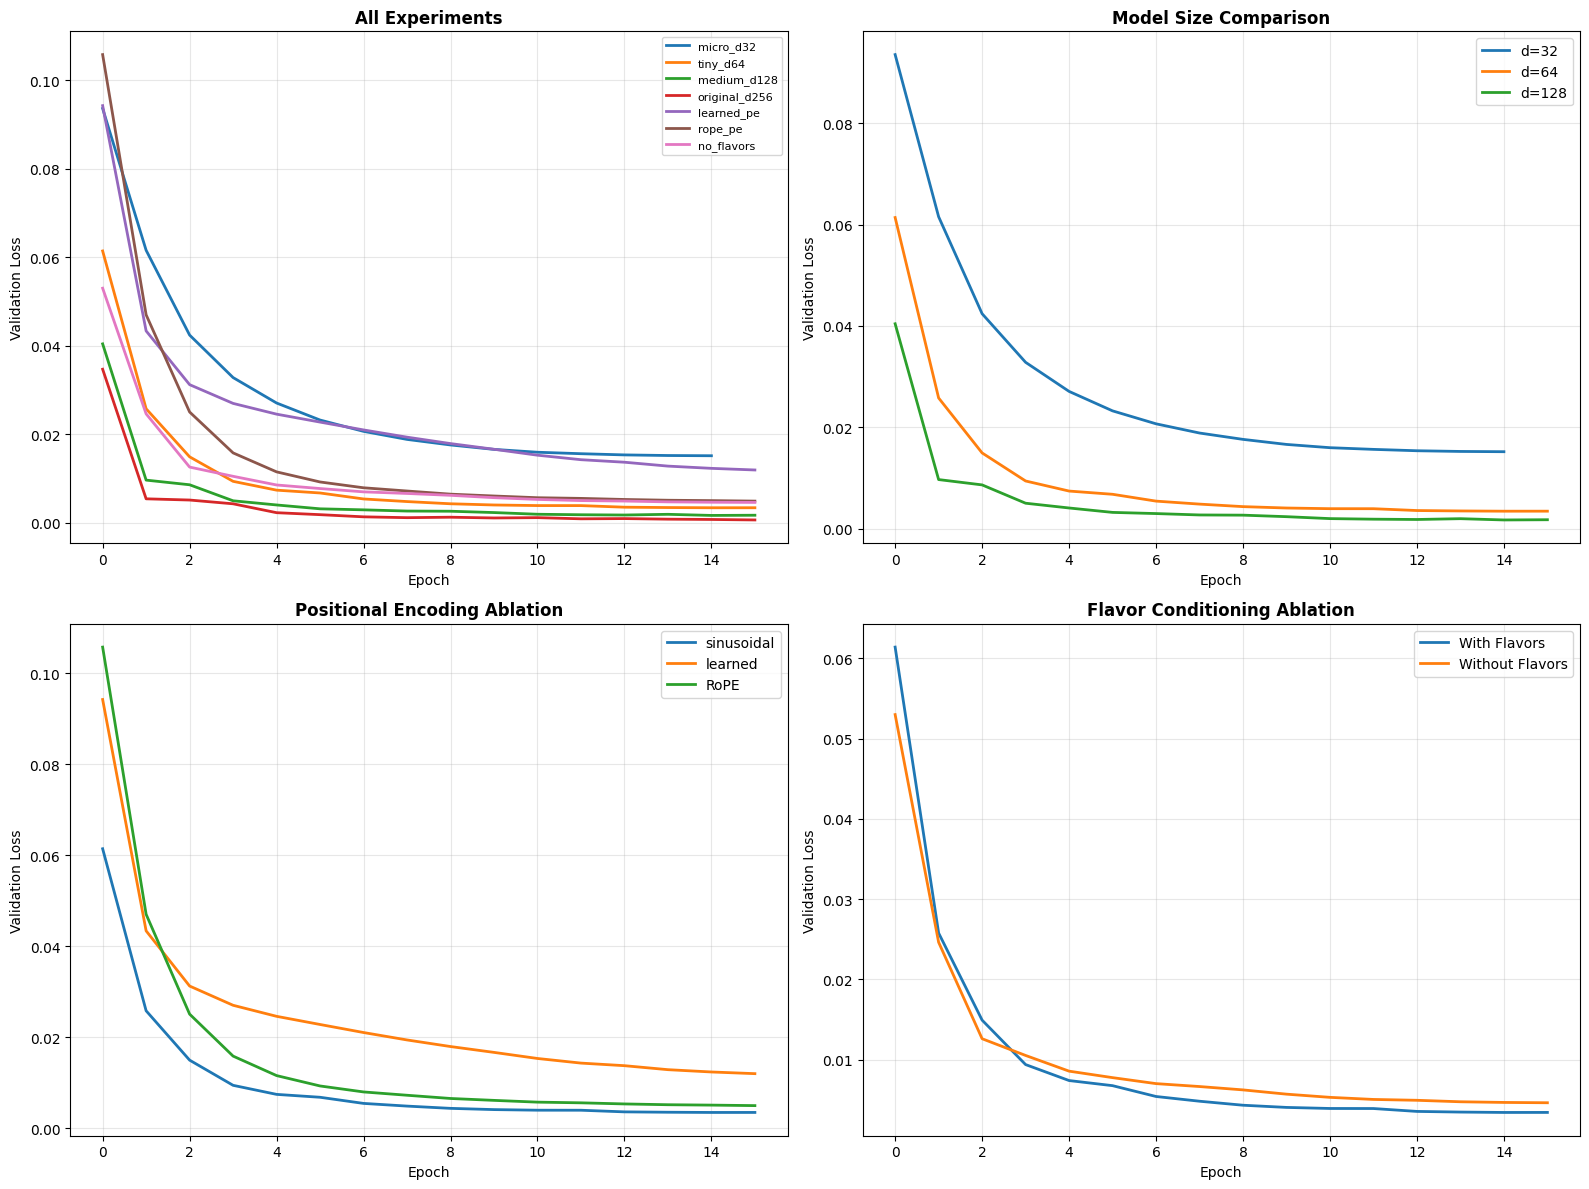

✅ Saved: results/comprehensive_analysis.png


In [13]:
# Training curves visualization
import matplotlib.pyplot as plt

if len(experiment_results) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Plot 1: All experiments
    ax = axes[0, 0]
    for exp_name, results in experiment_results.items():
        config = results['config']
        normalized = config.get('use_normalization', True)
        linestyle = '-' if normalized else '--'
        ax.plot(results['val_losses'], label=exp_name, linewidth=2, linestyle=linestyle)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Loss')
    ax.set_title('All Experiments', fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

    # Plot 2: Model size comparison
    ax = axes[0, 1]
    for exp_name in ['micro_d32', 'tiny_d64', 'medium_d128']:
        if exp_name in experiment_results:
            results = experiment_results[exp_name]
            ax.plot(results['val_losses'], label=f"d={results['config']['d_model']}", linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Loss')
    ax.set_title('Model Size Comparison', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 3: Positional encoding comparison
    ax = axes[1, 0]
    pe_map = {'tiny_d64': 'sinusoidal', 'learned_pe': 'learned', 'rope_pe': 'RoPE'}
    for exp_name, label in pe_map.items():
        if exp_name in experiment_results:
            results = experiment_results[exp_name]
            ax.plot(results['val_losses'], label=label, linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Loss')
    ax.set_title('Positional Encoding Ablation', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Plot 4: Flavor ablation
    ax = axes[1, 1]
    if 'tiny_d64' in experiment_results and 'no_flavors' in experiment_results:
        ax.plot(experiment_results['tiny_d64']['val_losses'], label='With Flavors', linewidth=2)
        ax.plot(experiment_results['no_flavors']['val_losses'], label='Without Flavors', linewidth=2)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Loss')
    ax.set_title('Flavor Conditioning Ablation', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('results/comprehensive_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("✅ Saved: results/comprehensive_analysis.png")

## 🔟 PACKAGE RESULTS

In [14]:
# Package everything
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
package_name = f'roastformer_COMPREHENSIVE_{timestamp}.zip'

print("="*80)
print("PACKAGING COMPREHENSIVE RESULTS")
print("="*80)

with zipfile.ZipFile(package_name, 'w', zipfile.ZIP_DEFLATED) as zipf:

    # Results
    if os.path.exists('results/comprehensive_comparison.csv'):
        zipf.write('results/comprehensive_comparison.csv', 'comprehensive_comparison.csv')
        print("✅ comprehensive_comparison.csv")

    if os.path.exists('results/comprehensive_analysis.png'):
        zipf.write('results/comprehensive_analysis.png', 'comprehensive_analysis.png')
        print("✅ comprehensive_analysis.png")

    # Checkpoints
    for exp_name, exp_data in all_results.items():
        if exp_data['status'] == 'SUCCESS':
            checkpoint = Path(exp_data['config']['checkpoint_dir']) / 'best_transformer_model.pt'
            if checkpoint.exists():
                zipf.write(checkpoint, f'checkpoints/{exp_name}_model.pt')
                print(f"✅ checkpoints/{exp_name}_model.pt")

    # Results JSON
    for exp_name, exp_data in all_results.items():
        if exp_data['status'] == 'SUCCESS':
            results_file = Path(exp_data['config']['results_dir']) / 'transformer_training_results.json'
            if results_file.exists():
                zipf.write(results_file, f'results/{exp_name}_results.json')

    # Summary
    summary = f"""RoastFormer Comprehensive Experiment Results
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

═══════════════════════════════════════════════════════════════
COMPREHENSIVE ABLATION STUDIES
═══════════════════════════════════════════════════════════════

Total Experiments: {len(all_results)}
Successful: {sum(1 for r in all_results.values() if r['status'] == 'SUCCESS')}

Study 1: Model Size (d=32 vs d=64 vs d=128)
Study 2: Positional Encoding (sinusoidal vs learned vs RoPE)
Study 3: Flavor Conditioning (with vs without flavors)
Study 4: Debugging (broken vs fixed)

═══════════════════════════════════════════════════════════════
RESULTS SUMMARY
═══════════════════════════════════════════════════════════════

{comparison_df.to_string(index=False) if comparison_data else 'No results'}

═══════════════════════════════════════════════════════════════
KEY FINDINGS
═══════════════════════════════════════════════════════════════

Best Model: {best['Experiment'] if comparison_data else 'N/A'}
Configuration: d_model={best['d_model'] if comparison_data else 'N/A'}, {best['Pos. Encoding'] if comparison_data else 'N/A'} PE
Performance: {best['Best RMSE (°F)'] if comparison_data else 'N/A'}°F RMSE

For your presentation:
1. Show positional encoding comparison (validates your RoPE presentation)
2. Show flavor ablation (validates novel contribution)
3. Show model size impact (demonstrates understanding of capacity)
4. Show broken vs fixed (demonstrates debugging methodology)

═══════════════════════════════════════════════════════════════
FILES INCLUDED
═══════════════════════════════════════════════════════════════

1. comprehensive_comparison.csv - Full results table
2. comprehensive_analysis.png - 4-panel visualization
3. checkpoints/*.pt - All trained models
4. results/*.json - Detailed training logs
5. SUMMARY.txt - This file

═══════════════════════════════════════════════════════════════
NEXT STEPS
═══════════════════════════════════════════════════════════════

1. Use best checkpoint in evaluation demo
2. Include ablation results in presentation
3. Cite these experiments in methodology writeup
4. Share with Claude for analysis and insights
"""

    zipf.writestr('SUMMARY.txt', summary)
    print("✅ SUMMARY.txt")

print(f"\n📦 Package: {package_name}")
print(f"   Size: {os.path.getsize(package_name) / 1024 / 1024:.2f} MB")
print("="*80)

PACKAGING COMPREHENSIVE RESULTS
✅ comprehensive_comparison.csv
✅ comprehensive_analysis.png
✅ checkpoints/micro_d32_model.pt
✅ checkpoints/tiny_d64_model.pt
✅ checkpoints/medium_d128_model.pt
✅ checkpoints/original_d256_model.pt
✅ checkpoints/learned_pe_model.pt
✅ checkpoints/rope_pe_model.pt
✅ checkpoints/no_flavors_model.pt
✅ SUMMARY.txt

📦 Package: roastformer_COMPREHENSIVE_20251120_152131.zip
   Size: 91.63 MB


In [15]:
# Download
from google.colab import files

print("Downloading comprehensive results package...")
files.download(package_name)
print("\n✅ Download complete!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download complete!


## 🎉 Comprehensive Training Complete!

### What You Have:

1. ✅ **Complete ablation studies**:
   - Model size comparison
   - Positional encoding comparison (INCLUDING RoPE!)
   - Flavor conditioning ablation
   - Optional broken model comparison

2. ✅ **Scientific validation**:
   - RoPE performance (validates your presentation)
   - Flavor impact (validates novel contribution)
   - Model capacity effects

3. ✅ **Presentation-ready materials**:
   - Comparison tables
   - 4-panel visualization
   - Complete narrative

### For Your Presentation:

**Slide 1**: "We compared three positional encoding methods..."
- Show PE ablation results
- Highlight RoPE if it won
- Connect to your RoPE presentation

**Slide 2**: "We tested our novel contribution: flavor-guided generation..."
- Show with/without flavors comparison
- Quantify impact (X°F improvement)
- Discuss implications

**Slide 3**: "Model capacity matters, but regularization helps..."
- Show model size comparison
- Discuss params/sample ratio
- Justify tiny_d64 as production choice

---

**You now have a complete scientific study!** 🎯🔬